In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(100, noise = 0.25, random_state = 2)

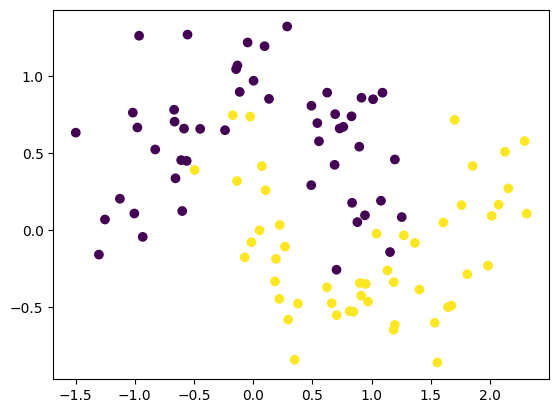

In [3]:
plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

In [11]:
model1 = Sequential()

model1.add(Dense(128, activation = 'relu', input_dim = 2))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [32]:
history1= model1.fit(X,y, epochs = 1000, validation_split = 0.2, verbose = 0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


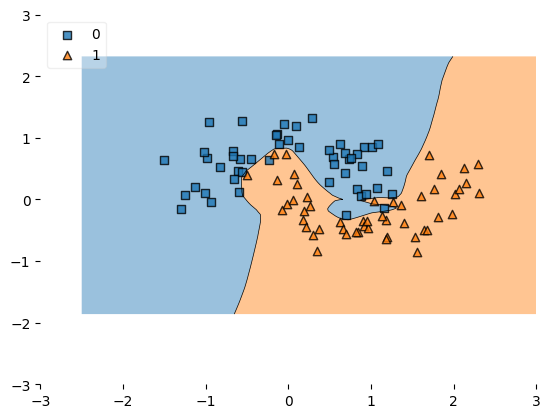

In [14]:
plot_decision_regions(X, y.astype('int'), clf=model1,legend=2)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

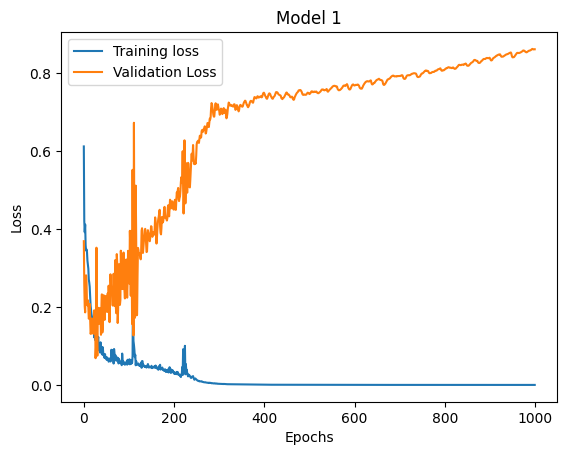

In [15]:
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import HeNormal, GlorotUniform
from tensorflow.keras import regularizers

# Model 2
* Used HeNormal weight initialization because it suits RelU activation function, for sigmoid function we use Glorot Uniform.
* for first hidden layer we used l2 regularizer (weight decay). It penalizes large weights to keep them small and distributed. for second hidden layer we used l1 regularizer (Lasso). It can drive unimportant weights to exactly zero, effectively performing automatic feature selection.
* Used dropout 0.3 and 0.35 (It randomly "turns off" a percentage of neurons during each training step. This forces the network to find multiple independent paths to the correct answer, making it much more robust on new, unseen data.)
* BatchNormalization: As the model trains, the distribution of inputs to internal layers changes (Internal Covariate Shift), forcing layers to constantly readapt. It centers and scales the activations. This allows for faster training, higher learning rates, and acts as a minor form of regularization.

In [25]:
model2= Sequential()

model2.add(Dense(128, kernel_initializer= HeNormal(), kernel_regularizer = regularizers.l2(0.01), input_dim = X.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.3))

model2.add(Dense(128, kernel_initializer = HeNormal(), kernel_regularizer = regularizers.l1(0.001)))
model2.add(BatchNormalization())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.35))

model2.add(Dense(1, activation = 'sigmoid', kernel_initializer = GlorotUniform()))

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,073 (199.50 KB)

 Trainable params: 50,561 (197.50 KB)

 Non-trainable params: 512 (2.00 KB)

In [26]:
adam = Adam(learning_rate = 0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics =['accuracy'])

In [28]:
history2 = model2.fit(X,y, epochs = 1000, validation_split = 0.2, verbose =0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


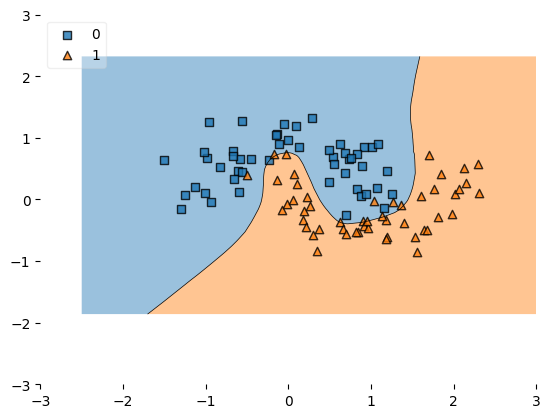

In [29]:
plot_decision_regions(X, y.astype('int'),clf=model2, legend =2)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

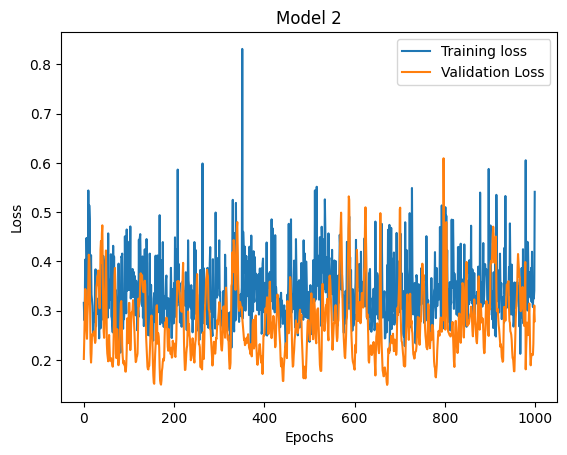

In [30]:
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()